In [1]:
#import necessary packages
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse 
import seaborn as sns
import glob
import sys
sys.path.append('..')
from placecode.spatial_coding_functions import cell_morphology

loading the data in order to visualize

In [49]:
mouse_ID='OPI2356'
condition='24hrs_post_SD'
date=231108

In [50]:
exported_data_folder='D:/sd_project_pbox/exported_data'

home_folder=f"{exported_data_folder}/{mouse_ID}/{condition}"
cnmf_file=glob.glob(f"{home_folder}/*.hdf5") #data from cnmf
cnmf_file=cnmf_file[0]
spatial=cell_morphology(cnmf_file)

#spatial = np.reshape(spatial, (512, 512, n_neurons))# (262144 -> 512x512, i.e. "unflatten")
spatial = np.transpose(spatial, axes=[2, 1,0])  # move neuron index to end
spatial=np.sum(spatial,axis=0) #collapsinf the 3d array into 2d array so that have all of the cells in one matrix

In [51]:
spatial3=spatial

<Axes: >

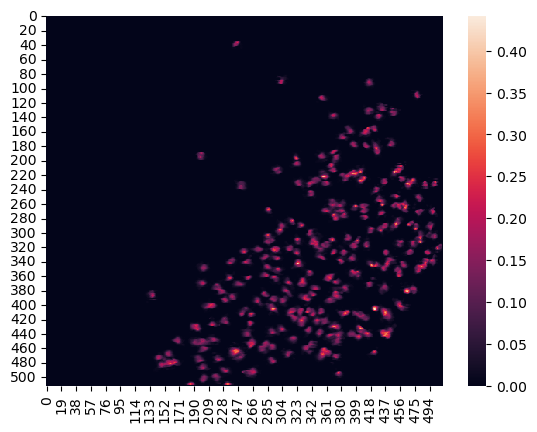

In [54]:
sns.heatmap(spatial3)

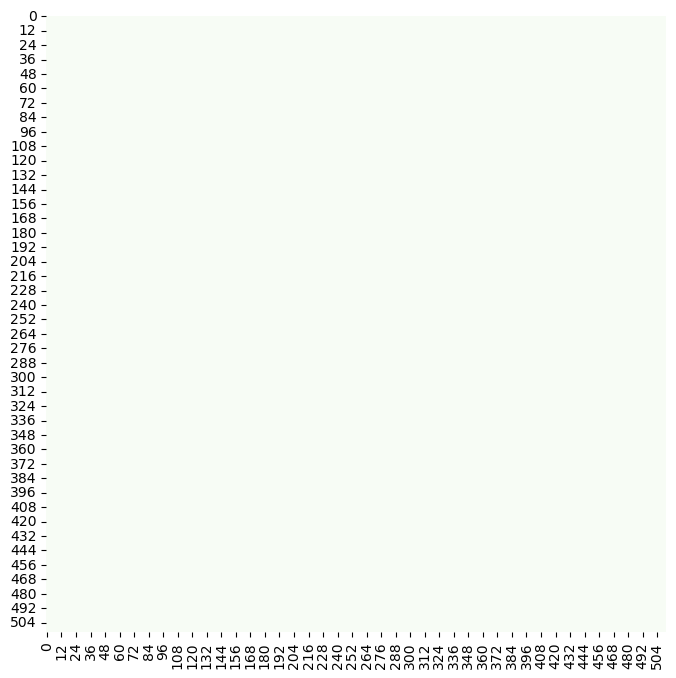

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
for data,color in zip([spatial1,spatial2,spatial3],['Blues','Reds','Greens']):
    data[data>0]=1
    sns.heatmap(data,ax=ax,cmap=color,cbar=False,alpha=1)


In [5]:
#opening the hpf5 file
hdf=h5py.File(data_cells)

defining the spatial parameters

In [6]:
A_data=hdf['estimates']['A']['data']
A_indices=hdf['estimates']['A']['indices']
A_indptr=hdf['estimates']['A']['indptr']
A_shape=hdf['estimates']['A']['shape']

In [7]:
#number of neurons
n_neurons=len(hdf['estimates']['C'])

In [10]:
spatial = scipy.sparse.csc.csc_matrix((A_data, A_indices, A_indptr),shape=A_shape).todense()
spatial = np.array(spatial)  # change type to allow np.reshape (?)
spatial = np.reshape(spatial[:,5], (512, 512)) # (262144 -> 512x512, i.e. "unflatten")

C:\Users\Theodore Tamiolakis\AppData\Local\Temp\ipykernel_26920\3095482161.py:1: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  spatial = scipy.sparse.csc.csc_matrix((A_data, A_indices, A_indptr),shape=A_shape).todense()


Text(0.5, 1.0, 'Cell morphology')

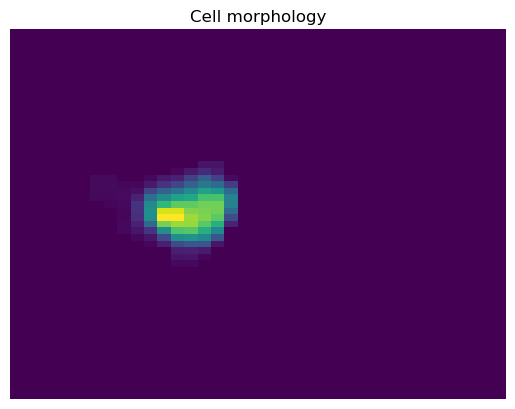

In [64]:
from scipy.ndimage import gaussian_filter

indices=np.where(spatial>0)

v_viz=20 #value for better visualization

#filtered=gaussian_filter(spatial,sigma=-1)

# Determine minimum and maximum row and column indices
min_row, max_row = np.min(indices[0]), np.max(indices[0])
min_col, max_col = np.min(indices[1]), np.max(indices[1])

# Extract the sub-array corresponding to the area where the cell appears
viz_values=np.array([min_row-v_viz,max_row+1+v_viz,min_col-v_viz,max_col+1+v_viz])
# Replace any value less than zero with zero
viz_values[viz_values < 0] = 0

sub_data = spatial[viz_values[0]:viz_values[1], viz_values[2]:viz_values[3]]

# Plot the sub-array using Seaborn's heatmap

fig,ax1=plt.subplots(1,1)
sns.heatmap(sub_data, cmap='viridis',cbar=False,ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(f'Cell morphology')

In [8]:
spatial = scipy.sparse.csc.csc_matrix((A_data, A_indices, A_indptr),shape=A_shape).todense()
spatial = np.array(spatial)  # change type to allow np.reshape (?)
spatial = np.reshape(spatial, (512, 512, n_neurons)) # (262144 -> 512x512, i.e. "unflatten")
spatial = np.transpose(spatial, axes=[2, 1,0])  # move neuron index to end
spatial=np.sum(spatial,axis=0) #collapsinf the 3d array into 2d array so that have all of the cells in one matrix

C:\Users\Theodore Tamiolakis\AppData\Local\Temp\ipykernel_26920\2660342118.py:1: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  spatial = scipy.sparse.csc.csc_matrix((A_data, A_indices, A_indptr),shape=A_shape).todense()


plotting and saving the field of view

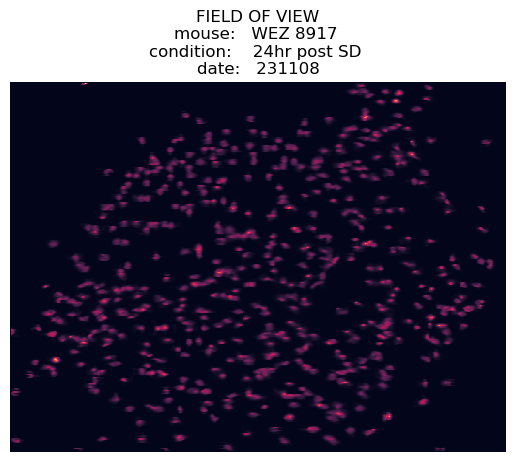

In [9]:
ax=sns.heatmap(spatial,cbar=False,xticklabels=False, yticklabels=False)
ax.set_title(f'FIELD OF VIEW\nmouse:   {mouse_ID} \ncondition:    {condition} \ndate:   {date}')
plt.savefig(f'{date}_{mouse_ID}_{condition}_fov.pdf')